In [89]:
import numpy as np
import matplotlib.pyplot as plt
from pydmd import DMD

Take a Numpy array and perform DMD

In [90]:
file_dir = r'D:\Pycharm Projects\EEG-Game\EEGNetExports\EEG-Game_Josh Schrock_EPOCFLEX-F0000172_EPOCFLEX_123045_2022.06.21T14.54.07.04.00\plv\alpha'
file = f'{file_dir}\\Numpy_Net_of_EEG-Game_Josh Schrock_EPOCFLEX-F0000172_EPOCFLEX_123045_2022.06.21T14.54.07.04.00.npy'
X = np.load(file)

Set up DMD

In [91]:
matricies = []
print(X.shape)
for i in range(X.shape[0]):
    matricies.append(X[i])
    print(X[i].shape)

dmd = DMD(svd_rank=14)
dmd.fit(matricies)

(33, 14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)
(14, 14)


Check reconstruction

ValueError: num must be 1 <= num <= 16, not 17

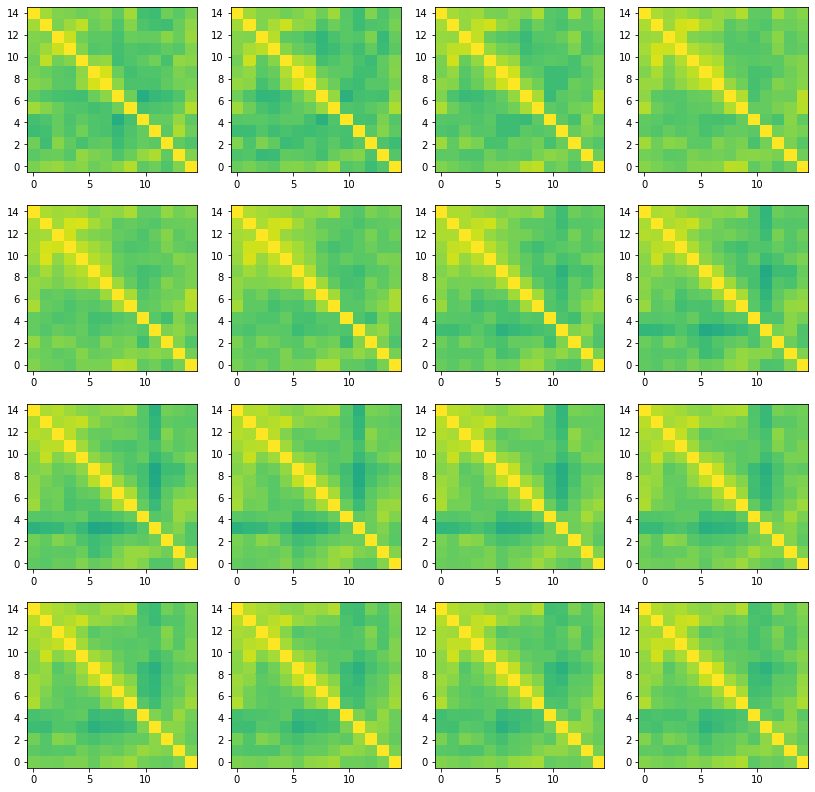

In [92]:
x1 = np.linspace(14, 0, 14)
x2 = np.linspace(0, 14, 14)
x1grid, x2grid = np.meshgrid(x1, x2)
fig = plt.figure(figsize=(14,14))
for id_subplot, snapshot in enumerate(dmd.reconstructed_data.T, start=1):
    plt.subplot(4, 4, id_subplot)
    plt.pcolor(x1grid, x2grid, snapshot.reshape(x1grid.shape).real, vmin=-1, vmax=1)